# Load and clean movies data


In [1]:
import sys
import os
import matplotlib.pyplot as plt

# Add the parent directory (project root) to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from src.data_utils import df_movies, movies_rating


In [ ]:
def recommend_genre_based(movies, movies_ratings):
    
    movies["genres"] = movies["genres"].str.split("|")

    # Explode genre list to have one genre per row
    exploded_genres = movies[["movieid", "genres"]].explode("genres")
    
    valid_genres = exploded_genres[exploded_genres["genres"] != "(no genres listed)"]

    movies_rating = movies_ratings.merge(valid_genres, on="movieid", how="inner")

    genre_stats = movies_rating.groupby("genres", as_index=False).agg(
        genre_rating=("avg_rating", "mean"), genre_count=("genres", "count")
    )
    top_genres = genre_stats.sort_values(ascending=False, by="genre_rating").reset_index(
        drop=True
    )

    return top_genres.head(10)


In [3]:
print(recommend_genre_based(df_movies, movies_rating))

         genres  genre_rating  genre_count
0   Documentary      3.381749         5605
1     Film-Noir      3.317678          353
2          IMAX      3.251714          195
3           War      3.246202         1874
4       Musical      3.200513         1054
5         Drama      3.178779        25606
6       Romance      3.146859         7719
7     Animation      3.101087         2929
8         Crime      3.092589         5319
9       Mystery      3.045695         2925
10       Comedy      3.041585        16870
11     Children      3.032906         2935
12      Western      3.025748         1399
13      Fantasy      3.021618         2731
14    Adventure      3.012054         4145
15     Thriller      2.944022         8654
16       Action      2.926095         7348
17       Sci-Fi      2.760476         3595
18       Horror      2.650632         5989


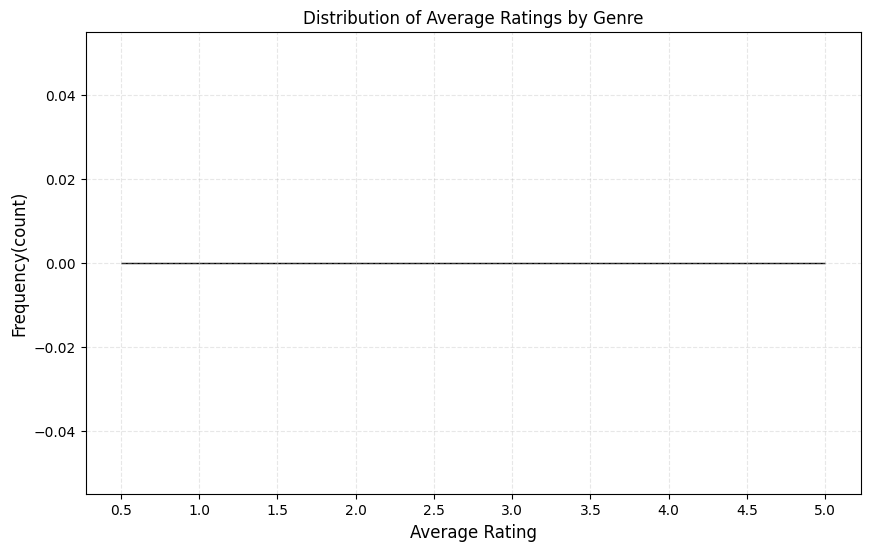

In [5]:
genre_stats = recommend_genre_based(df_movies, movies_rating).head(10)
plt.figure(figsize=(10, 6))
bins = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
plt.hist(genre_stats["genre_rating"], bins=bins, edgecolor="black")
plt.title("Distribution of Average Ratings by Genre")
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Frequency(count)", fontsize=12)
plt.grid(True, alpha=0.3, linestyle="--")
plt.xticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()